<a href="https://colab.research.google.com/github/fxnnxc/class-MachineLearning/blob/master/Assignment05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment05 
Logistic Regression

## 1. Plot the training data

plot the training data points (x,y) with their labels in colors (blue for label 0 and red for label 1)

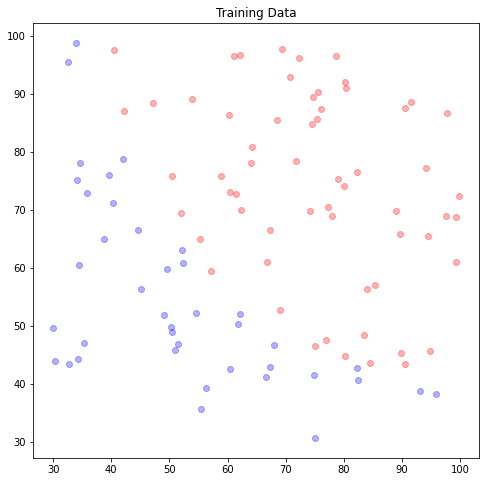

In [2]:
# Read data
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data5.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.title('Training Data')
plt.show()

## 2. Plot the estimated parameters

$σ(z)$ where $z= \theta_0 + \theta_1 x + \theta_2 y$

In [0]:
# Define Functions
import math

def sigmoid(x):
  return 1/(1+math.exp(-x))

def deriv_sigmoid(x):
  T = sigmoid(x)
  return T*(1- T)

def loss(t0,t1,t2, data):
  Z = [(t0+t1*d[0]+t2*d[1],d[2]) for d in data] 
  return sum([-z[1]*math.log(sigmoid(z[0]))-(1-z[1])*math.log(1-sigmoid(z[0])) for z in Z] )/len(data)

In [0]:
# Define Hyperparameters
lr = 0.0001
theta = [0,0,0]

In [0]:
# Training 
J  = loss(theta[0],theta[1],theta[2],data)
THETA = [theta]
LOSS = [J]

while True:
  temp = J
  M = len(data)
  # Update Theta
  t0,t1,t2 = theta
  theta[0] =theta[0] - lr* sum([sigmoid(t0+t1*d[0]+t2*d[1]) - d[2] for d in data])/M
  theta[1] =theta[1] - lr* sum([(sigmoid(t0+t1*d[0]+t2*d[1]) - d[2])*d[0] for d in data])/M
  theta[2] =theta[2] - lr* sum([(sigmoid(t0+t1*d[0]+t2*d[1]) - d[2])*d[1] for d in data])/M
  THETA.append([theta[0], theta[1],theta[2]]) # Store Theta

  # Update and Store Loss
  J = loss(theta[0], theta[1], theta[2], data)
  LOSS.append(J)
  if abs(t0-theta[0])  + abs(t1-theta[1]) + abs(t2-theta[2])  <0.00001: # Convergence
    break

Text(0.5, 1.0, 'estimated parameters using the training dataest')

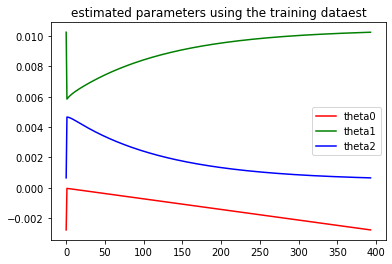

In [44]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue'] 
for i in range(3): # 색깔별로 출력
  plt.plot([THETA[j][i] for j in range(len(THETA))], c=colors[i])
plt.legend(['theta0', 'theta1', 'theta2'])
plt.title('estimated parameters using the training dataest')